# Single Image Prediction with Trained Model


## Enter the MMSegmentation main directory

In [1]:
import os
os.chdir('mmsegmentation')

In [2]:
os.getcwd()

'/home/featurize/work/CFA/mmsegmentation'

## Import Packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv
import cv2

## Load Model: KNet

In [6]:
# Model config file
config_file = 'Zihao-Configs/ZihaoDataset_KNet_20230818.py'

# Model checkpoint file
checkpoint_file = 'checkpoint/KNet_best_mIoU_iter_14000.pth'

# device = 'cpu'
device = 'cuda:0'

model = init_model(config_file, checkpoint_file, device=device)

Loads checkpoint by local backend from path: checkpoint/KNet_best_mIoU_iter_14000.pth


## Load Model: Fast-SCNN

In [9]:
# # Model config file
# config_file = 'Zihao-Configs/ZihaoDataset_FastSCNN_20230818.py'

# # Model checkpoint file
# checkpoint_file = 'checkpoint/FastSCNN_best_mIoU_iter_23000.pth'

# # device = 'cpu'
# device = 'cuda:0'

# model = init_model(config_file, checkpoint_file, device=device)

## Load test image or new image

In [7]:
# img_path = 'Watermelon87_Semantic_Seg_Mask/img_dir/val/01bd15599c606aa801201794e1fa30.jpg'

# img_path = 'Watermelon87_Semantic_Seg_Mask/img_dir/val/la_wm_img01.jpg'

img_path = 'data/demo_p0.jpg'

In [8]:
img_bgr = cv2.imread(img_path)

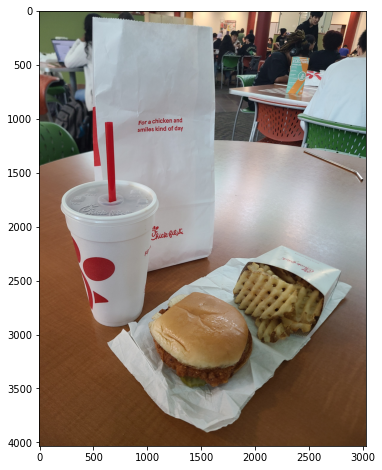

In [19]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bgr[:,:,::-1])
plt.savefig('outputs/K1-00.jpg')
plt.show()

# ## Semantic Segmentation Prediction

In [10]:
result = inference_model(model, img_bgr)

In [11]:
result.keys()

['pred_sem_seg', 'seg_logits']

In [12]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [13]:
pred_mask.shape

(4032, 3024)

In [14]:
np.unique(pred_mask)

array([0, 1, 2, 3])

# ## Semantic Segmentation Prediction Results - Qualitative

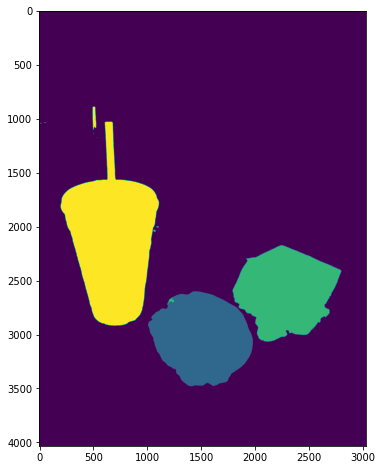

In [15]:
plt.figure(figsize=(8, 8))
plt.imshow(pred_mask)
plt.savefig('outputs/K1-0.jpg')
plt.show()

## Semantic Segmentation Prediction Results - Quantitative

In [16]:
result.seg_logits.data.shape

torch.Size([4, 4032, 3024])

# ## Visualizing Semantic Segmentation Prediction Results - Method 1

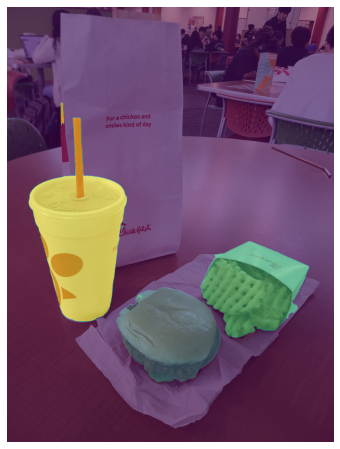

In [17]:
# Display semantic segmentation results
plt.figure(figsize=(10, 8))
plt.imshow(img_bgr[:,:,::-1])
plt.imshow(pred_mask, alpha=0.55) # alpha controls the transparency of the highlighted area; lower values make it closer to the original image
plt.axis('off')
plt.savefig('outputs/K1-1.jpg')
plt.show()

# ## Visualizing Semantic Segmentation Prediction Results - Method 2 (Side-by-Side with Original)

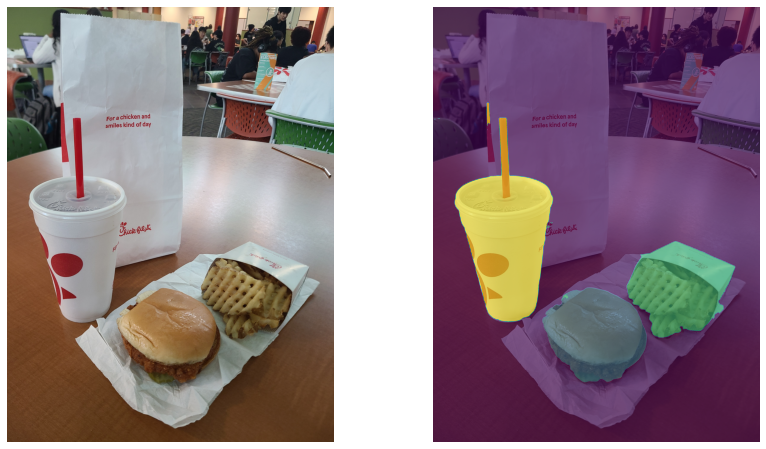

In [18]:
plt.figure(figsize=(14, 8))

plt.subplot(1,2,1)
plt.imshow(img_bgr[:,:,::-1])
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_bgr[:,:,::-1])
plt.imshow(pred_mask, alpha=0.6) # alpha controls the transparency of the highlighted area; lower values make it closer to the original image
plt.axis('off')
plt.savefig('outputs/K1-2.jpg')
plt.show()